# Exploring Willy Wonka

### Introduction

### Reading prompt

* consumer trends and make recs to executives

In [1]:
import pandas as pd
from lib import load_data, group_and_print

In [2]:
engine, df = load_data()

In [3]:
query = 'select sum(order_value), week from orders group by week'


### Consider the dimension

In [4]:
user_cols = ['user_age', 'user_gender'] # user_id, order_id
order_cols = ['order_single_item', 'order_date', 'order_item_count']
marketing_cols = ['order_channel', 'order_referrer', 'order_ad_shown', 'order_is_freeshipping', 'order_coupon_code', 'user_loyalty_program']
timing_cols = ['order_day_part', 'order_date', 'month', 'week', 'dow']
location_cols = ['order_store_city', 'order_store_id']


user_age


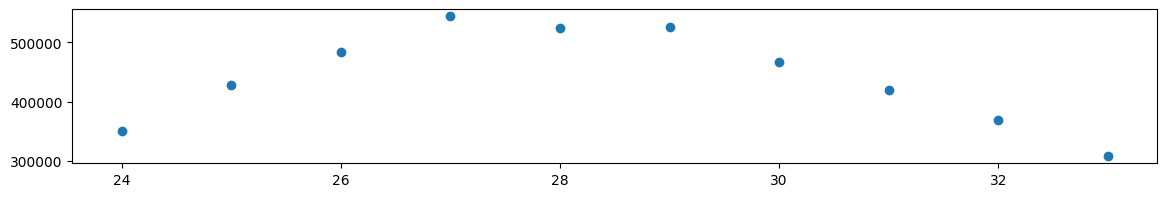

user_gender


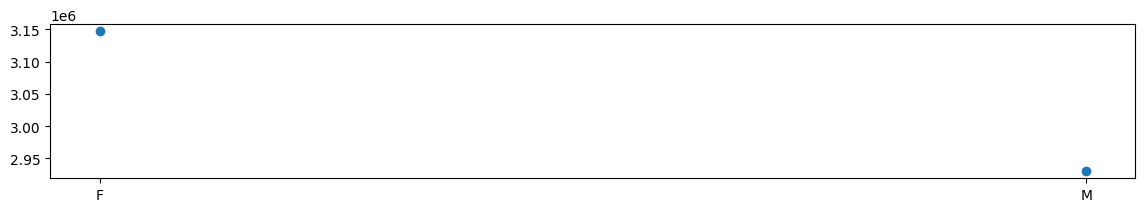

In [5]:
group_and_print('orders', user_cols, engine)

order_store_city


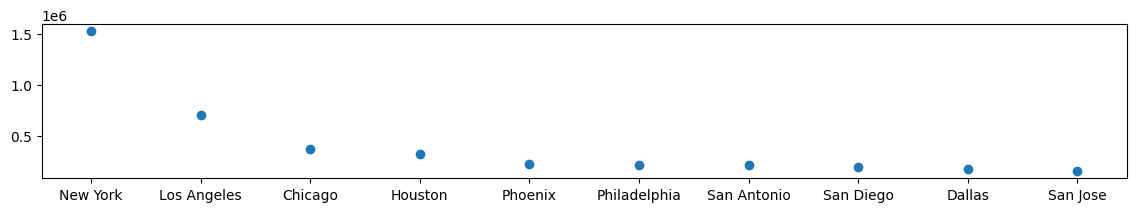

order_store_id


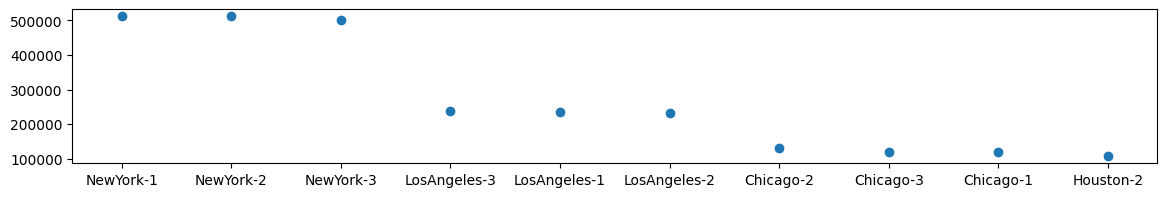

In [6]:
group_and_print('orders', location_cols, engine)

order_day_part


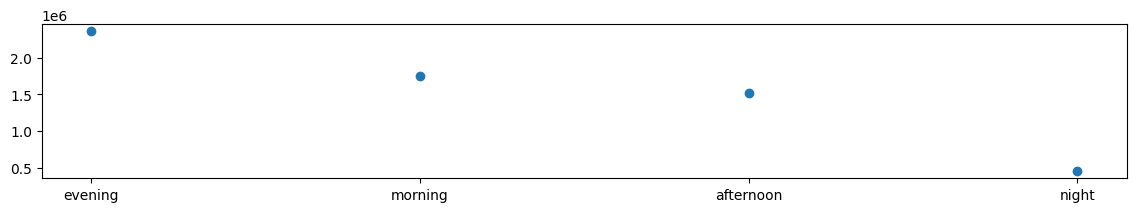

order_date


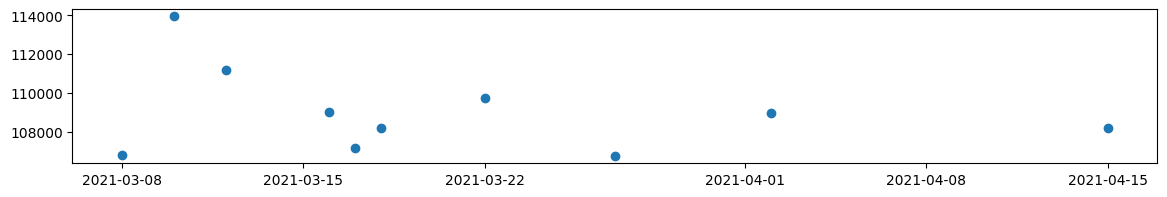

month


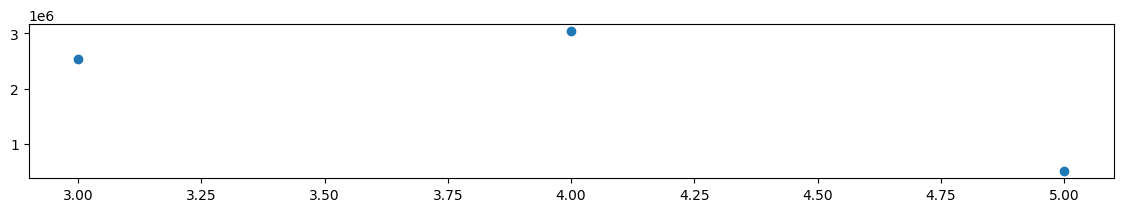

week


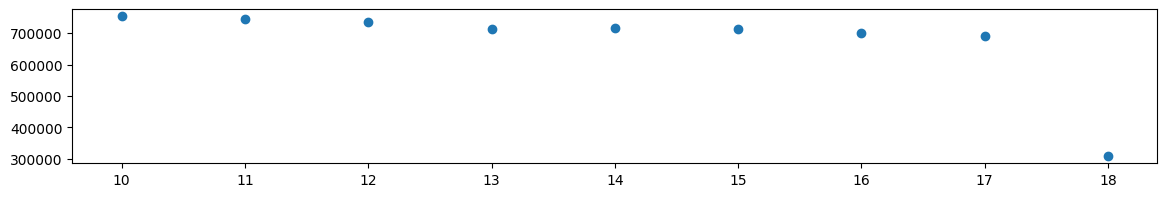

dow


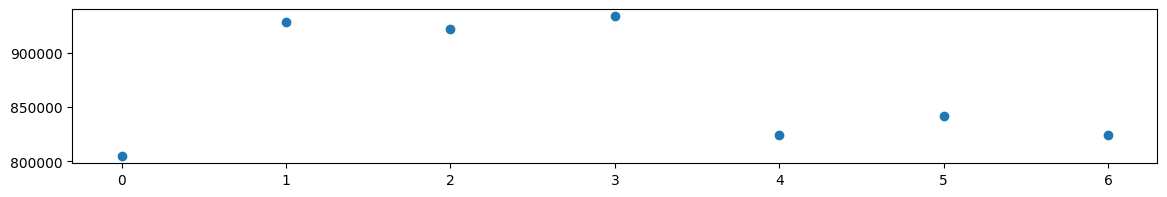

In [7]:
group_and_print('orders', timing_cols, engine)

order_channel


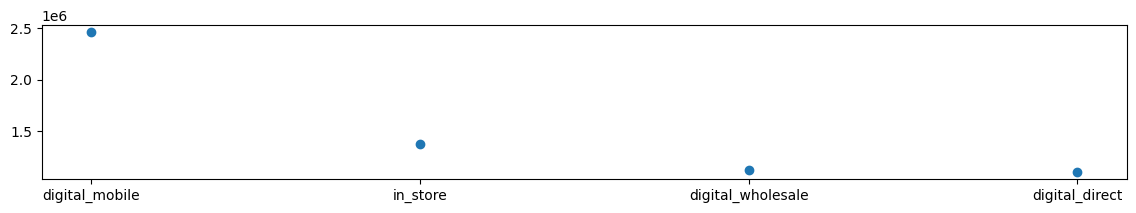

order_referrer


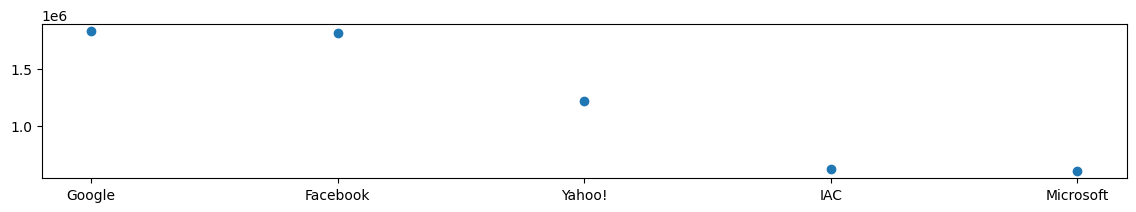

order_ad_shown


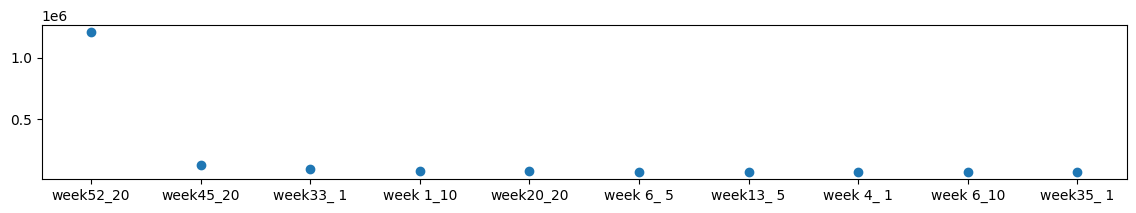

order_is_freeshipping


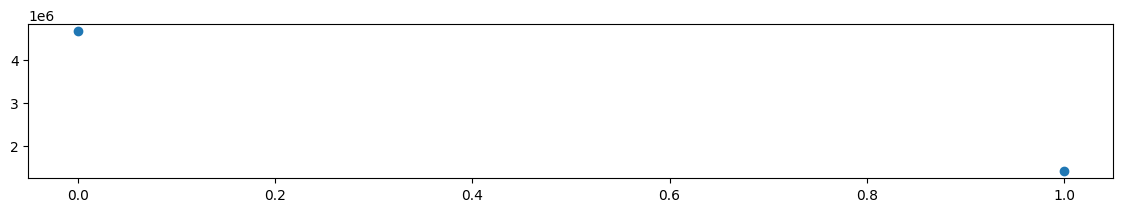

order_coupon_code


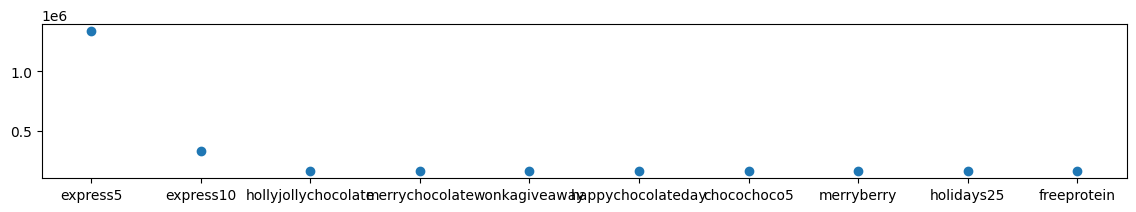

user_loyalty_program


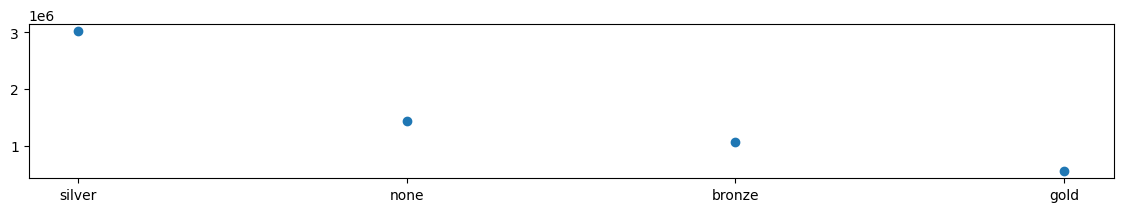

In [8]:
from lib import build_grouped_by, print_grouped_by, group_and_print
marketing_cols = ['order_channel', 'order_referrer', 
'order_ad_shown', 'order_is_freeshipping', 
'order_coupon_code', 'user_loyalty_program']



group_and_print('orders', marketing_cols, engine)


order_store_city


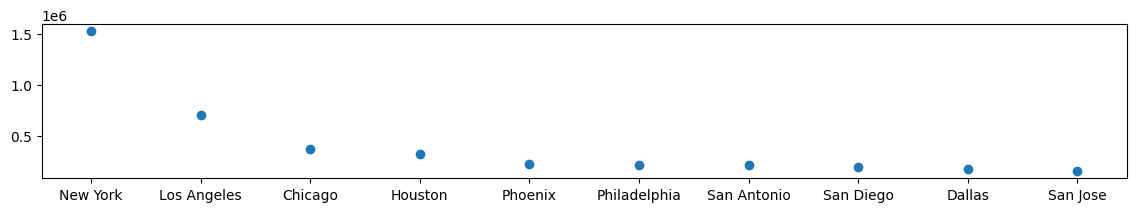

order_store_id


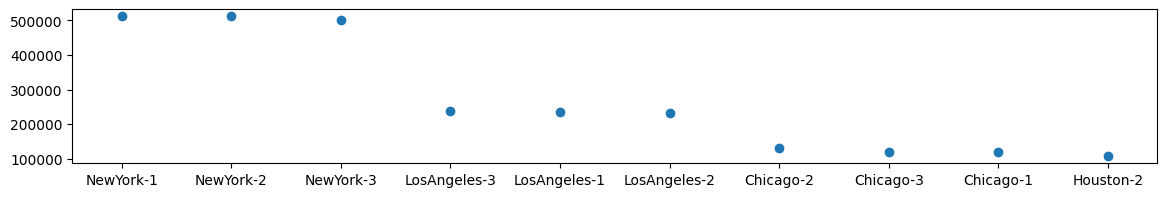

In [9]:
location_cols = ['order_store_city', 'order_store_id']
group_and_print('orders', location_cols, engine)

user_age


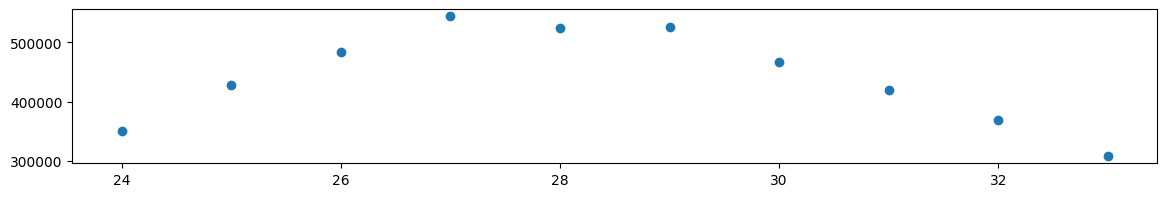

user_gender


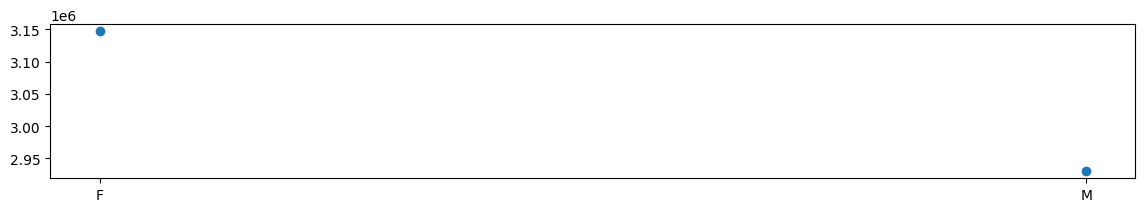

In [10]:
user_cols = ['user_age', 'user_gender']
group_and_print('orders', user_cols, engine)

### For Products switch to line items

list_sku


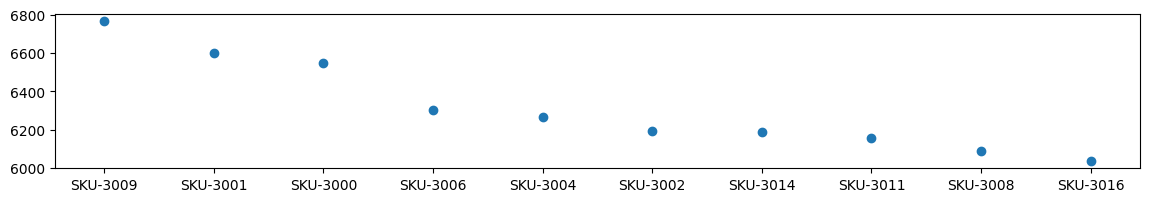

list_sku_category


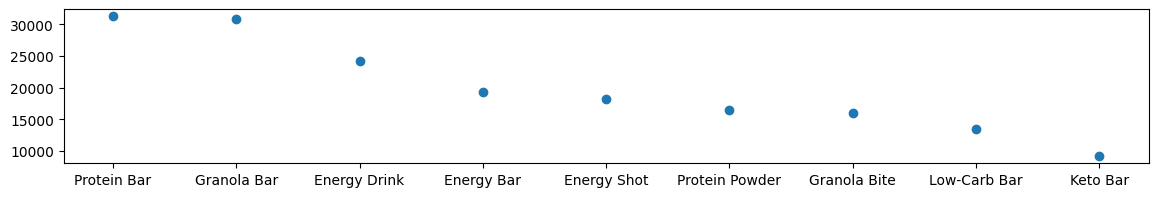

list_sku_flavor


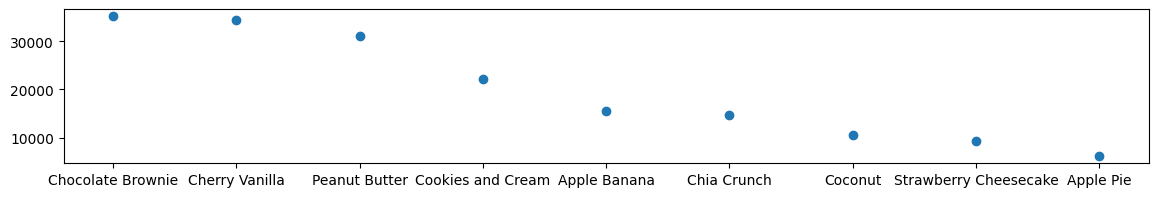

In [11]:
from lib import group_and_print_count
product_cols = ['list_sku', 'list_sku_category', 'list_sku_flavor'] 

group_and_print_count('line_items', product_cols, engine)

### Dig Deeper with Pivot Table

In [73]:
import numpy as np
table = pd.pivot_table(df, values='order_value',
                    columns=['user_age'], index = ['user_gender'], aggfunc=np.sum, fill_value=0)

In [80]:
f_values = table.loc['F']

In [81]:
m_values = table.loc['M']

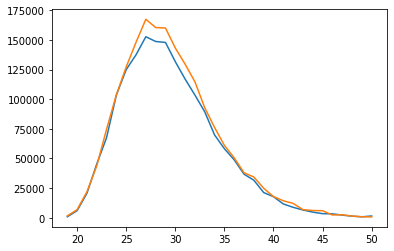

In [82]:
import matplotlib.pyplot as plt
plt.plot(table.columns, m_values)
plt.plot(table.columns, f_values)
plt.show()

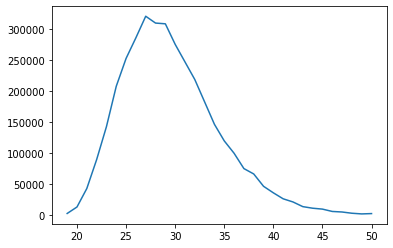

In [67]:
import matplotlib.pyplot as plt
plt.plot(table.columns, table.values[0])

plt.show()